In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#inertia_ is used to find the inter cluster distance
#kmeans.labels_ is usd to print the labels (0,1,2,)

# KMeans for Continious DataFrame

#  Step1: Data Reading And Data Understanding

In [2]:
retail=pd.read_csv("OnlineRetail.csv",encoding="unicode_escape")

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [117]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
retail.shape

(541909, 8)

# Step 2: Data Cleansing

In [119]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
pd.isna(retail).sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [121]:
df_null=round(100*(retail.isnull().sum())/len(retail),2) #To calculate the null values in percentage and rounding of to two decimal
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [122]:
retail=retail.dropna()

In [123]:
retail.shape # Data Frame after droping null values

(406829, 8)

In [124]:
retail.loc[retail.Quantity<0]# Stock Unavailable, so negative values in Quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [125]:
retail.CustomerID = retail.CustomerID.astype(str) #Converting CustomerID into String for further proceessing

In [126]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


# Step 3: Data Processing

R(Recency):Number of days since last purchase  
F(Frequency): Number of Transactions  
M(Monetary): Total amount of transactions(revenue contributed) 

Monetary
To get the total cost multiply Quantity and unit price

In [15]:
retail["Amount"]=retail.Quantity*retail.UnitPrice

In [16]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [17]:
retail.loc[retail.Amount<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


In [18]:
rfm_m=retail.groupby("CustomerID")["Amount"].sum()
rfm_m.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [19]:
rfm_m=rfm_m.reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [23]:
scaler=StandardScaler()
rfm_df_scaled=scaler.fit_transform(rfm_m)
type(rfm_df_scaled)

numpy.ndarray

In [132]:
rfm_m

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [133]:
retail.CustomerID.unique().shape #Number of rows in unique customer id is equal to rfm_m as we gouped by customer id only

(4372,)

Frequency: To check the number of times the customer purchases

In [134]:
rfm_f=retail.groupby("CustomerID")["InvoiceDate"].count()

In [135]:
rfm_f=rfm_f.reset_index()
rfm_f.columns=["CustomerID","Frequency"]
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [136]:
rfm=pd.merge(rfm_m,rfm_f,on="CustomerID",how="inner") # Merging the monetary & Frequency on Customer ID
rfm

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


Recency: To Calculate on number od days since their last purchase

# pd.to_datetime(retail["InvoiceDate"]
 #This format is uesd to to conert the column into date time64 format in yyyy/mm/dd/  format only its default format

# retail.InvoiceDate.dt.strftime('%d/%m/%Y')
 This format is uesd to to convert the column into any format("d,m,y","m,y,d)") we want but it converts as
object not datetime64

In [8]:
retail["InvoiceDate"]=pd.to_datetime(retail["InvoiceDate"]) # This format is uesd to to conert the column into date time64 format in mm/dd/yyyy  format

In [9]:
retail["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

retail1=pd.read_csv("OnlineRetail.csv",encoding="unicode_escape")

retail1.dropna()

retail1["InvoiceDate"]= retail.InvoiceDate.dt.strftime('%d/%m/%Y')# This format is uesd to to conert the column into any format we want but it converts as object not datetime64

retail1["InvoiceDate"]

retail1["InvoiceDate"]=pd.to_datetime(retail1["InvoiceDate"])

retail1["InvoiceDate"]

In [139]:
max_date=max(retail["InvoiceDate"]) #Getting the last final date the oder was made
max_date

Timestamp('2011-12-09 12:50:00')

In [140]:
retail["Diff"]=max_date-retail["InvoiceDate"] # to get the last purchase made by the customer

In [141]:
retail.Diff

0        373 days 04:24:00
1        373 days 04:24:00
2        373 days 04:24:00
3        373 days 04:24:00
4        373 days 04:24:00
                ...       
541904     0 days 00:00:00
541905     0 days 00:00:00
541906     0 days 00:00:00
541907     0 days 00:00:00
541908     0 days 00:00:00
Name: Diff, Length: 406829, dtype: timedelta64[ns]

In [142]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00


In [12]:
rfm_r=retail.groupby("CustomerID")["Diff"].min()

KeyError: 'Column not found: Diff'

In [149]:
rfm_r=rfm_r.reset_index()
rfm_r

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [150]:
rfm_r.Diff=rfm_r.Diff.dt.days #To get only days

In [242]:
## rfm_r["Diff"] =rfm_r.Diff.astype(str)

In [151]:
rfm_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  4372 non-null   object
 1   Diff        4372 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.4+ KB


In [11]:
rfm_r["CustomerID"] =rfm_r.CustomerID.astype(str)

NameError: name 'rfm_r' is not defined

In [10]:
rfm=pd.merge(rfm,rfm_r,on="CustomerID",how="inner")
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']

NameError: name 'rfm' is not defined

In [6]:
rfm

NameError: name 'rfm' is not defined

In [155]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4372 non-null   object 
 1   Amount      4372 non-null   float64
 2   Frequency   4372 non-null   int64  
 3   Recency     4372 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 170.8+ KB


# Outliers Analysis

Two types of outliers are there and we treat outliers as it can skew our dataset.     
.Statistical       
.Domain specific

Text(0.5, 0, 'Attributes')

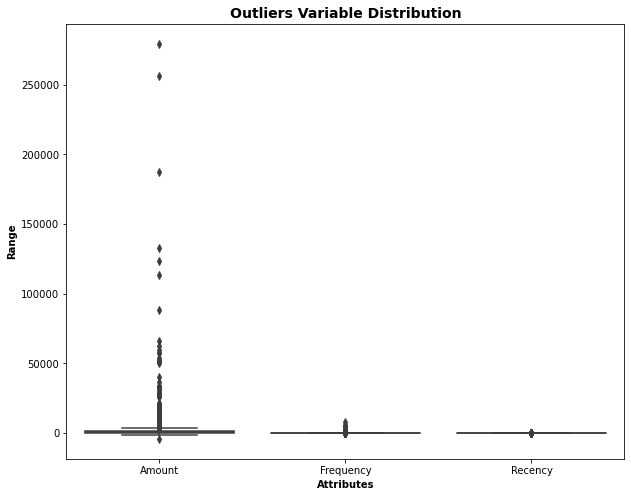

In [156]:
attribute=['Amount', 'Frequency', 'Recency']
plt.rcParams["figure.figsize"]=[10,8]
sns.boxplot(data=rfm[attribute])
plt.title("Outliers Variable Distribution",fontsize=14,fontweight='bold')
plt.ylabel("Range",fontweight="bold")
plt.xlabel("Attributes",fontweight="bold")

In [183]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.25)
Q3 = rfm.Amount.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]



Text(0.5, 0, 'Attributes')

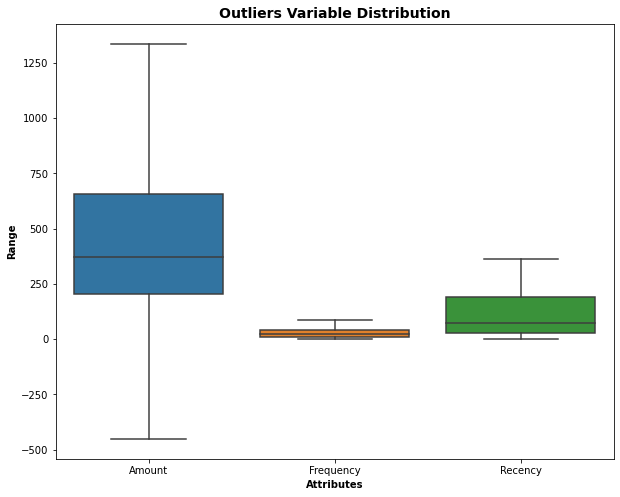

In [184]:
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

# Scaling

In [4]:
rfm_df=rfm[['Amount','Frequency','Recency']]

scaler=StandardScaler()
rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

NameError: name 'rfm' is not defined

In [186]:
rfm_df_scaled

array([[-1.41243956, -1.26670103,  2.09280005],
       [-0.39393462, -0.5675579 ,  1.93498098],
       [-1.14136618, -1.17348195,  0.88942957],
       ...,
       [-0.8623738 , -0.8938247 ,  1.61934282],
       [-1.16628056, -1.03365332,  0.66256465],
       [-0.87455687, -0.75399607, -1.04385415]])

In [188]:
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns=['Amount','Frequency','Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-1.412440,-1.266701,2.092800
1,-0.393935,-0.567558,1.934981
2,-1.141366,-1.173482,0.889430
3,1.875163,1.343433,1.165613
4,-0.013214,-0.753996,0.988066


In [189]:
rfm_df_scaled.shape

(2714, 3)

In [190]:
rfm_df_scaled.describe()

,Amount,Frequency,Recency
count,2.714000e+03,2.714000e+03,2.714000e+03
mean,-2.550568e-16,1.828555e-17,2.577157e-17
std,1.000184e+00,1.000184e+00,1.000184e+00
min,-2.787360e+00,-1.313311e+00,-1.112900e+00
25%,-7.911028e-01,-8.006056e-01,-8.367166e-01
50%,-2.827488e-01,-2.412911e-01,-3.928504e-01
75%,5.906481e-01,6.442902e-01,7.488720e-01
max,2.657012e+00,2.788329e+00,2.457757e+00


# Step 6 : Model Building

In [191]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=4)

In [192]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 0])

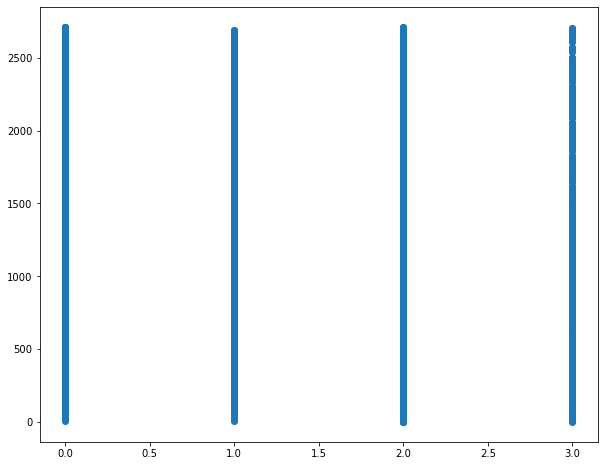

In [193]:
plt.scatter(x=kmeans.labels_,y=rfm_df_scaled.index)

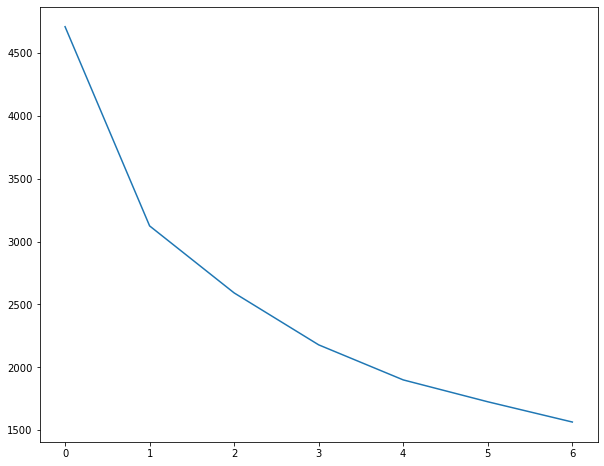

In [194]:
ssd=[]
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50) #(default max_iter=50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

In [195]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=3)

In [196]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 1])

In [197]:
rfm_df_scaled

,Amount,Frequency,Recency
0,-1.412440,-1.266701,2.092800
1,-0.393935,-0.567558,1.934981
2,-1.141366,-1.173482,0.889430
3,1.875163,1.343433,1.165613
4,-0.013214,-0.753996,0.988066
...,...,...,...
2709,-1.115081,-0.940434,-0.550670
2710,-0.882780,-0.940434,-0.392850
2711,-0.862374,-0.893825,1.619343
2712,-1.166281,-1.033653,0.662565


In [199]:
rfm["cluster_Id"]=kmeans.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,cluster_Id
0,12346.0,0.0,2,325,0
4,12350.0,334.4,17,309,0
6,12353.0,89.0,4,203,0
7,12354.0,1079.4,58,231,2
8,12355.0,459.4,13,213,0


<AxesSubplot:xlabel='cluster_Id', ylabel='Amount'>

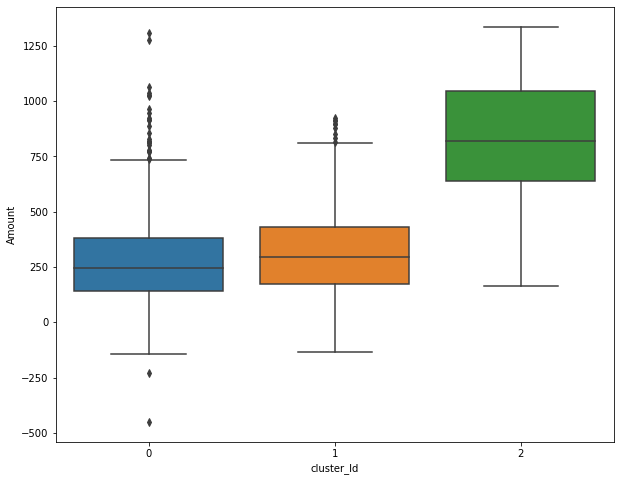

In [201]:
sns.boxplot(x="cluster_Id",y="Amount",data=rfm) # Box plot visulaize Amount 

By visualizing the graph we come to know in cluster one we have people with large amount of transaction (monetary) it changes every time when we runt the program from first

<AxesSubplot:xlabel='cluster_Id', ylabel='Frequency'>

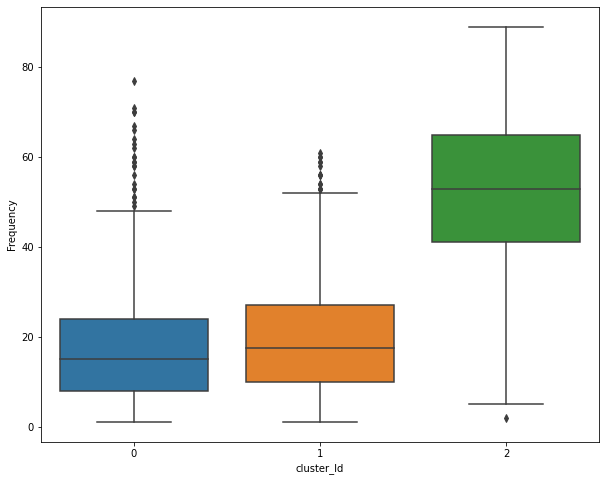

In [202]:
sns.boxplot(x="cluster_Id",y="Frequency",data=rfm) # Box plot visulaize Frequency

By visualizing the graph we come to know in cluster one we have people with large count of transaction (frequency) it changes every time when we runt the program from first

<AxesSubplot:xlabel='cluster_Id', ylabel='Recency'>

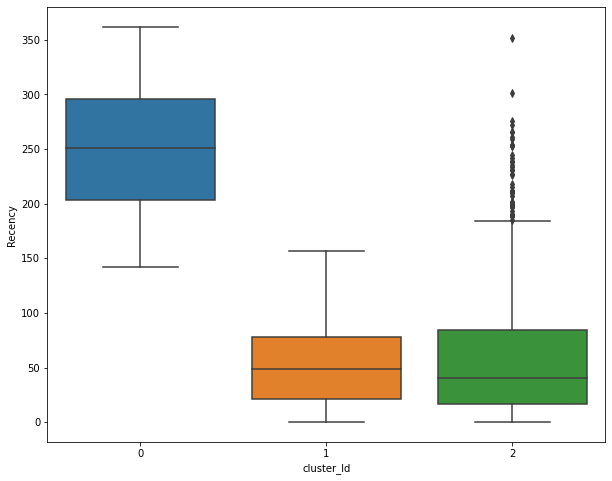

In [203]:
sns.boxplot(x="cluster_Id",y="Recency",data=rfm) # Box plot visulaize Recency

In [208]:
rfm

,CustomerID,Amount,Frequency,Recency,cluster_Id
0,12346.0,0.00,2,325,0
4,12350.0,334.40,17,309,0
6,12353.0,89.00,4,203,0
7,12354.0,1079.40,58,231,2
8,12355.0,459.40,13,213,0
...,...,...,...,...,...
4365,18277.0,97.63,9,57,1
4366,18278.0,173.90,9,73,1
4367,18280.0,180.60,10,277,0
4368,18281.0,80.82,7,180,0


By visualizing the graph we come to know in cluster zero we have people with recent transaction (recency) it changes every time when we runt the program from first

# # KMeans for Categorical DataFrame

In [57]:
data1=pd.read_csv("customers-1.csv")

In [58]:
data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# In Categorical data we want to do encode that is convert string into binary value 

One hot encoding method    
data2=pd.get_dummies(data1,columns=["Gender"])

In [60]:
x=data1["Age"]
y=data1["Spending Score (1-100)"]

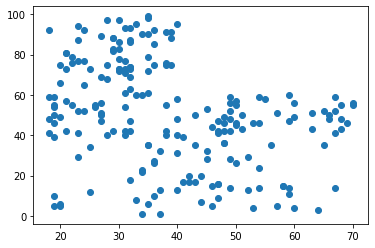

In [61]:
plt.scatter(x,y)

In [62]:
z=np.array(list(zip(x,y)))

In [63]:
z

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [64]:
km=KMeans(n_clusters=5)
km.fit(z)

KMeans(n_clusters=5)

In [65]:
km.labels_

array([3, 0, 2, 0, 3, 0, 2, 0, 4, 0, 4, 0, 4, 0, 2, 0, 3, 3, 4, 0, 3, 0,
       4, 0, 4, 0, 4, 3, 2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 1, 0, 1, 3,
       4, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 0, 2, 0, 1, 0, 4, 0, 4, 0,
       3, 0, 2, 0, 4, 0, 2, 0, 4, 0, 3, 0, 2, 0, 1, 0, 2, 0, 4, 0, 4, 0,
       4, 0, 2, 0, 2, 0, 1, 0, 2, 0, 4, 0, 4, 0, 2, 3, 2, 0, 2, 0, 4, 0,
       4, 0, 4, 0, 2, 0, 4, 0, 1, 0, 4, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4, 0,
       2, 0])

In [66]:
km.predict(z)

array([3, 0, 2, 0, 3, 0, 2, 0, 4, 0, 4, 0, 4, 0, 2, 0, 3, 3, 4, 0, 3, 0,
       4, 0, 4, 0, 4, 3, 2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 1, 0, 1, 3,
       4, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 0, 2, 0, 1, 0, 4, 0, 4, 0,
       3, 0, 2, 0, 4, 0, 2, 0, 4, 0, 3, 0, 2, 0, 1, 0, 2, 0, 4, 0, 4, 0,
       4, 0, 2, 0, 2, 0, 1, 0, 2, 0, 4, 0, 4, 0, 2, 3, 2, 0, 2, 0, 4, 0,
       4, 0, 4, 0, 2, 0, 4, 0, 1, 0, 4, 0, 2, 0, 2, 0, 2, 0, 4, 0, 4, 0,
       2, 0])

In [69]:
labels=km.predict(z)

In [70]:
data1["cluster_predict"]=labels

In [71]:
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_predict
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,4
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


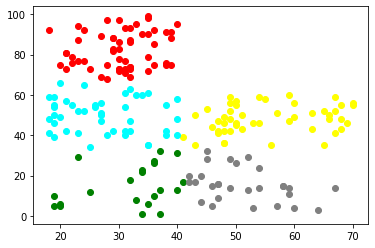

In [78]:
plt.scatter(x[data1["cluster_predict"]==0],y[data1["cluster_predict"]==0],c="Red")
plt.scatter(x[data1["cluster_predict"]==1],y[data1["cluster_predict"]==1],c="yellow")
plt.scatter(x[data1["cluster_predict"]==2],y[data1["cluster_predict"]==2],c="green")
plt.scatter(x[data1["cluster_predict"]==3],y[data1["cluster_predict"]==3],c="cyan")
plt.scatter(x[data1["cluster_predict"]==4],y[data1["cluster_predict"]==4],c="grey")

In [83]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(z)
    inertia.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


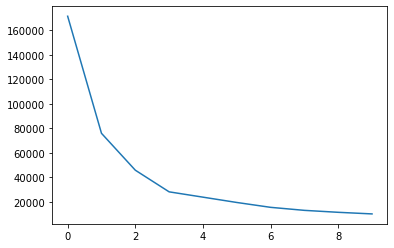

In [84]:
plt.plot(inertia)

In [89]:
kmeans1=KMeans(n_clusters=4)
kmeans1.fit(z)

KMeans(n_clusters=4)

In [92]:
labels2=kmeans1.predict(z)

In [93]:
data1["actual_cluster"]=labels2

In [94]:
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_predict,actual_cluster
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,2,2
3,4,Female,23,16,77,0,1
4,5,Female,31,17,40,3,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,1
196,197,Female,45,126,28,4,2
197,198,Male,32,126,74,0,1
198,199,Male,32,137,18,2,2


In [98]:
data1["actual_cluster"].value_counts()

1    57
0    48
2    48
3    47
Name: actual_cluster, dtype: int64

In [207]:
data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_predict,actual_cluster
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,2,2
3,4,Female,23,16,77,0,1
4,5,Female,31,17,40,3,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,1
196,197,Female,45,126,28,4,2
197,198,Male,32,126,74,0,1
198,199,Male,32,137,18,2,2


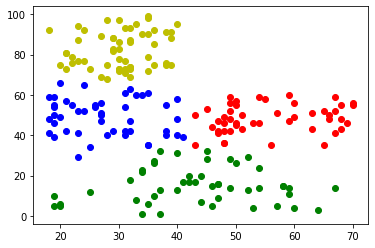

In [103]:
colour= "r","y","g","b"
for i in range(4):
    plt.scatter(x[data1["actual_cluster"]==i],y[data1["actual_cluster"]==i],c=colour[i])

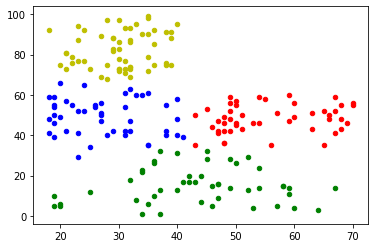

In [112]:
colour= "r","y","g","b"
for i in range(4):
    plt.scatter(x[data1["actual_cluster"]==i],y[data1["actual_cluster"]==i],s=20,c=colour[i])

In [106]:
print(range(4))

range(0, 4)


In [108]:
range(0,10)

range(0, 10)

In [109]:
range(1,11)

range(1, 11)